In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from utils import *

In [2]:
train = pd.read_csv('train_dataset.csv')

In [3]:
test = pd.read_csv('test_dataset.csv')

In [4]:
sample = pd.read_csv('sample_submission.csv')

In [5]:
rfc = RandomForestClassifier()
insample_scores = []
outsample_scores = []
com_cats = []
for com_range in full_ranges[1:]:
    col_ids = list_sum(x[1] for x in com_range)
    com_cat = string_sum(x[0] for x in com_range)
    errors = get_score(
        train.iloc[:, col_ids].values,
        train.loc[:, 'fault_severity'].values,
        rfc)
    insample_scores.append(errors[0])
    outsample_scores.append(errors[1])
    com_cats.append(com_cat)
res = pd.DataFrame({'insample_scores': insample_scores, 'outsample_scores': outsample_scores}, index=com_cats)

NameError: name 'get_score' is not defined

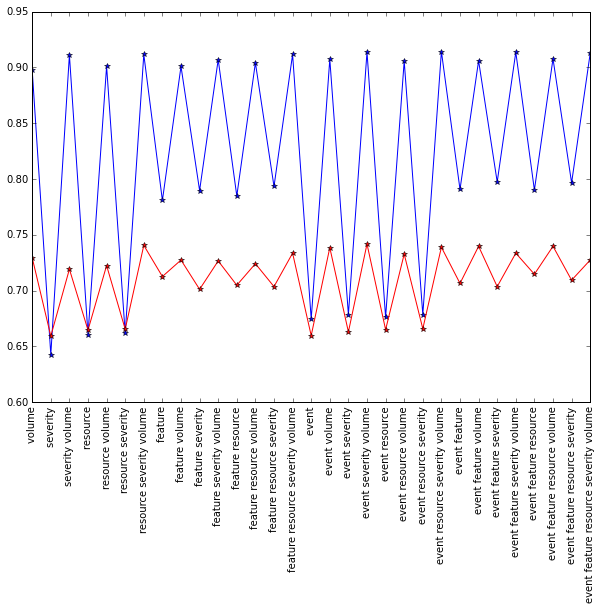

In [111]:
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
res.loc[:, 'insample_scores'].plot(kind='line', ax=ax, rot=90, marker='*')
res.loc[:, 'outsample_scores'].plot(kind='line', ax=ax, color='r', rot=90, marker='*')
plt.xticks(range(len(res.index)), res.index)
plt.show()

In [10]:
param = {'n_estimators': list(range(30, 80))}
rfc = RandomForestClassifier(n_jobs=-1)
gs = GridSearchCV(rfc, param)
gs.fit(train.loc[:, 'event_type 1':], train.loc[:, 'fault_severity'])

In [14]:
gs.best_params_

{'n_estimators': 46}

In [16]:
param = {'min_samples_split': list(range(2, 10))}
rfc = RandomForestClassifier(n_estimators=46, n_jobs=-1)
gs = GridSearchCV(rfc, param)
gs.fit(train.loc[:, 'event_type 1':], train.loc[:, 'fault_severity'])

In [20]:
gs.best_params_

{'min_samples_split': 8}

In [21]:
gs.best_score_

0.74827259178973038

In [112]:
rfc = RandomForestClassifier(n_estimators=46, min_samples_split=8)
insample_scores = []
outsample_scores = []
com_cats = []
for com_range in full_ranges[1:]:
    col_ids = list_sum(x[1] for x in com_range)
    com_cat = string_sum(x[0] for x in com_range)
    errors = get_score(
        train.iloc[:, col_ids].values,
        train.loc[:, 'fault_severity'].values,
        rfc)
    insample_scores.append(errors[0])
    outsample_scores.append(errors[1])
    com_cats.append(com_cat)
res = pd.DataFrame({'insample_scores': insample_scores, 'outsample_scores': outsample_scores}, index=com_cats)

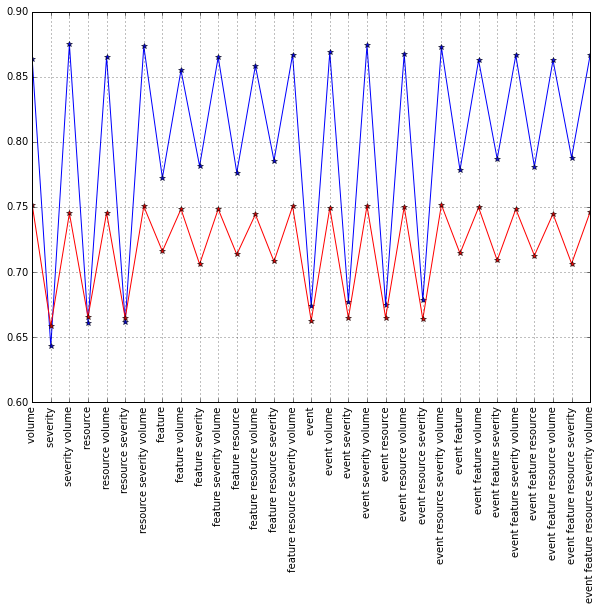

In [114]:
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
res.loc[:, 'insample_scores'].plot(kind='line', ax=ax, rot=90, marker='*')
res.loc[:, 'outsample_scores'].plot(kind='line', ax=ax, color='r', rot=90, marker='*')
plt.xticks(range(len(res.index)), res.index)
plt.grid()
plt.show()

In [137]:
rfc = RandomForestClassifier(n_estimators=46, min_samples_split=8)
insample_scores = []
outsample_scores = []
com_cats = []
for com_range in full_ranges[1:]:
    col_ids = list_sum(x[1] for x in com_range)
    com_cat = string_sum(x[0] for x in com_range)
    errors = get_evaluate(
        train.iloc[:, col_ids].values,
        train.loc[:, 'fault_severity'].values,
        rfc,
        random_state=487)
    insample_scores.append(errors[0])
    outsample_scores.append(errors[1])
    com_cats.append(com_cat)
res = pd.DataFrame({'insample_evaluates': insample_scores, 'outsample_evaluates': outsample_scores}, index=com_cats)

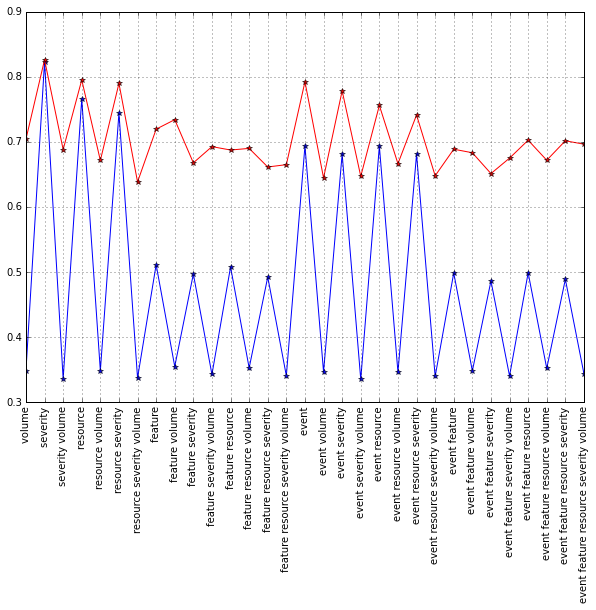

In [138]:
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
res.loc[:, 'insample_evaluates'].plot(kind='line', ax=ax, rot=90, marker='*')
res.loc[:, 'outsample_evaluates'].plot(kind='line', ax=ax, color='r', rot=90, marker='*')
plt.xticks(range(len(res.index)), res.index)
plt.grid()
plt.show()

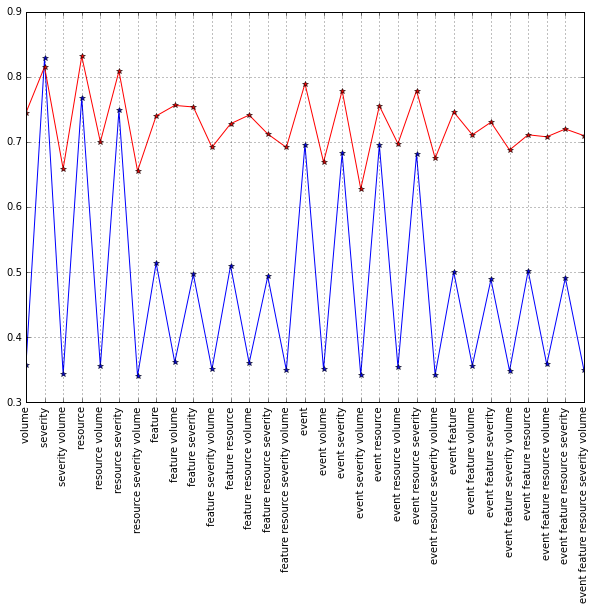

In [116]:
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
res.loc[:, 'insample_evaluates'].plot(kind='line', ax=ax, rot=90, marker='*')
res.loc[:, 'outsample_evaluates'].plot(kind='line', ax=ax, color='r', rot=90, marker='*')
plt.xticks(range(len(res.index)), res.index)
plt.grid()
plt.show()

In [139]:
param = {'n_estimators': list(range(30, 80))}
rfc = RandomForestClassifier(n_jobs=-1)
gs = GridSearchCV(rfc, param)
gs.fit(
    train
    .iloc[
        :, 
        list(range(train_event_start, train_event_end)) +
        list(range(train_severity_start, train_severity_end)) +
        list(range(train_volume_start, train_end))], 
    train.loc[:, 'fault_severity'])

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [140]:
gs.best_params_

{'n_estimators': 72}

In [143]:
param = {'min_samples_split': list(range(2, 10))}
rfc = RandomForestClassifier(n_estimators=46, n_jobs=-1)
gs = GridSearchCV(rfc, param)
gs.fit(
    train
    .iloc[
        :, 
        list(range(train_event_start, train_event_end)) +
        list(range(train_severity_start, train_severity_end)) +
        list(range(train_volume_start, train_end))], 
    train.loc[:, 'fault_severity'])

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=46, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [144]:
gs.best_params_

{'min_samples_split': 9}

In [8]:
rfc = RandomForestClassifier(n_estimators=72, min_samples_split=9)

In [9]:
rfc.fit(
    train
    .iloc[
        :, 
        list(range(train_event_start, train_event_end)) +
        list(range(train_severity_start, train_severity_end)) +
        list(range(train_volume_start, train_end))], 
    train.loc[:, 'fault_severity'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=9,
            min_weight_fraction_leaf=0.0, n_estimators=72, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
prob = rfc.predict_proba(
    test
    .iloc[
        :, 
        list(range(test_event_start, test_event_end)) +
        list(range(test_severity_start, test_severity_end)) +
        list(range(test_volume_start, test_end))])

In [11]:
prob.shape

(11171, 3)

In [12]:
rfc_res = pd.DataFrame({
    'id': sample.loc[:, 'id'].values, 
    'predict_0': prob[:, 0],
    'predict_1': prob[:, 1],
    'predict_2': prob[:, 2]})

In [13]:
rfc_res.head()

,id,predict_0,predict_1,predict_2
0,11066,0.994985,0.005015,0.000000
1,18000,0.164473,0.014669,0.820859
2,16964,0.998843,0.001157,0.000000
3,4795,0.597506,0.378960,0.023534
4,3392,0.204114,0.795886,0.000000


In [14]:
rfc_res.to_csv('randomforest.csv', index=False)